# Analysis of Portuguese Banking Institution
Naibo Hu

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from matplotlib.pyplot import figure
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as pyplot
from sklearn import metrics, model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import expon,reciprocal
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier as xgb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
# load data
df = pd.read_csv("Case Study Data.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no


In [3]:
# data demension
df.shape

(41188, 21)

In [4]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37444 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  36040 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Part I: Exploratory Data Analysis (EDA)
- Basic data insights
- Check multicollinearity among numeric variables 
- Check distribution of numeric variables using boxplot

#### Basic data insights

In [5]:
# Number of clients by subscription type
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

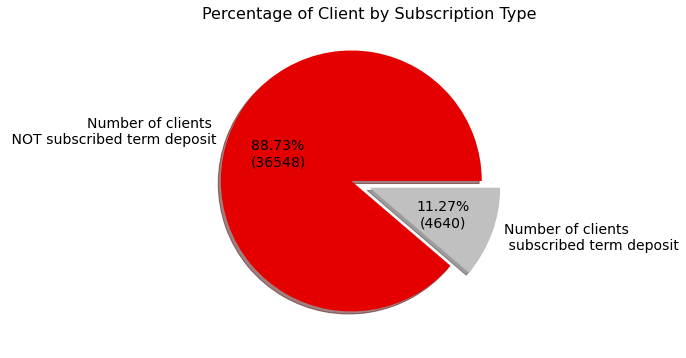

In [6]:
# plot pie chart
title = ['Number of clients \n NOT subscribed term deposit', 'Number of clients \n subscribed term deposit']
data = [df["y"].value_counts()[0], df["y"].value_counts()[1]]
color = ['#E50000','#C0C0C0']
explode = explode = (0.15, 0)
total = sum(data)
textprops = {"fontsize":15}
def my_fmt(x):
    #print(x)
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)



# Creating plot
fig = plt.figure(figsize =(6, 6))
plt.pie(data, labels = title, colors = color, explode = explode, shadow = True,autopct=my_fmt,textprops = {"fontsize":14})
plt.title("Percentage of Client by Subscription Type", fontsize = 16)
# show plot
plt.show()

In [7]:
# subscription by job type
temp = pd.DataFrame(df.groupby(["y", "job"])["job"].count()).rename(columns = {"job":"number of customer"}).reset_index().sort_values(by = "number of customer", ascending = False)
temp.head()

,y,job,number of customer
0,no,admin.,9070
1,no,blue-collar,8616
9,no,technician,6013
7,no,services,3646
4,no,management,2596


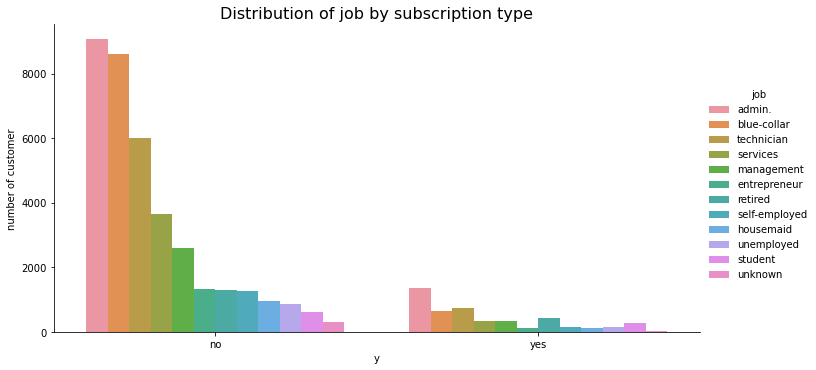

In [8]:
# visualize distribution of subscription by job type
sns.factorplot(x = 'y', y='number of customer', 
               hue = 'job',data=temp, kind='bar', size=5,  aspect=2)
plt.title("Distribution of job by subscription type", fontsize = 16)
plt.show()

In [9]:
# subscription by marital status
temp = pd.DataFrame(df.groupby(["y", "marital"])["marital"].count()).rename(columns = {"marital":"number of customer"}).reset_index().sort_values(by = "number of customer", ascending = False)
temp.head()

,y,marital,number of customer
1,no,married,22396
2,no,single,9948
0,no,divorced,4136
5,yes,married,2532
6,yes,single,1620


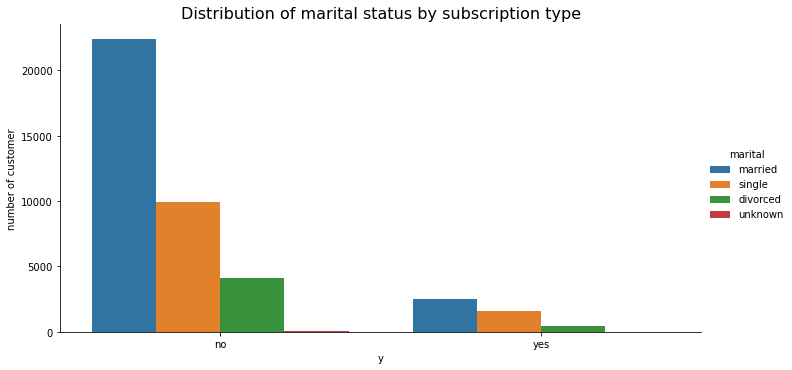

In [10]:
# visualize distribution of subscription by marital status
sns.factorplot(x = 'y', y='number of customer', 
               hue = 'marital',data=temp, kind='bar', size=5,  aspect=2)
plt.title("Distribution of marital status by subscription type", fontsize = 16)
plt.show()

In [11]:
# subscription by education
temp = pd.DataFrame(df.groupby(["y", "education"])["education"].count()).rename(columns = {"education":"number of customer"}).reset_index().sort_values(by = "number of customer", ascending = False)
temp.head()

,y,education,number of customer
6,no,university.degree,10498
3,no,high.school,8484
2,no,basic.9y,5572
5,no,professional.course,4648
0,no,basic.4y,3748


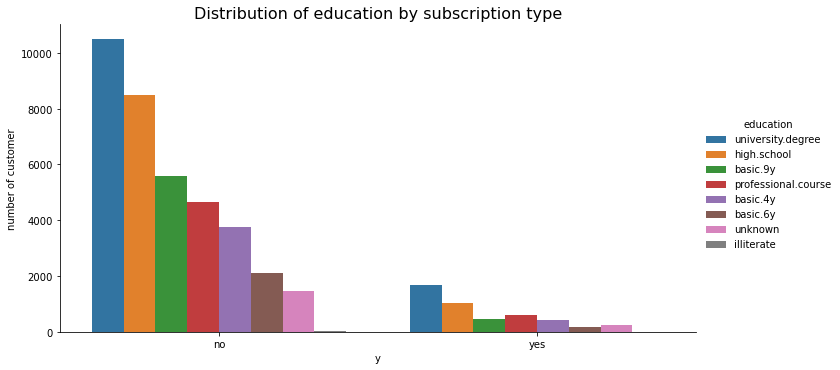

In [12]:
# visualize distribution of subscription by marital status
sns.factorplot(x = 'y', y='number of customer', 
               hue = 'education',data=temp, kind='bar', size=5,  aspect=2)
plt.title("Distribution of education by subscription type", fontsize = 16)
plt.show()

In [13]:
# subscription by default
temp = pd.DataFrame(df.groupby(["y", "default"])["default"].count()).rename(columns = {"default":"number of customer"}).reset_index().sort_values(by = "number of customer", ascending = False)
temp.head()

,y,default,number of customer
0,no,no,28391
1,no,unknown,8154
3,yes,no,4197
4,yes,unknown,443
2,no,yes,3


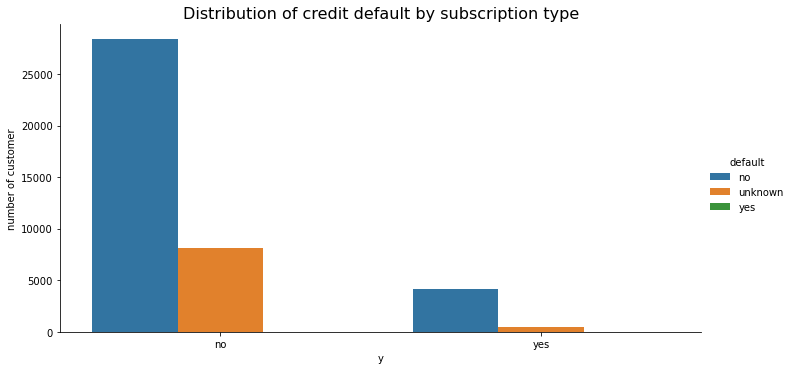

In [14]:
# visualize distribution of subscription by default
sns.factorplot(x = 'y', y='number of customer', 
               hue = 'default',data=temp, kind='bar', size=5,  aspect=2)
plt.title("Distribution of credit default by subscription type", fontsize = 16)
plt.show()

In [15]:
# subscription by contact method
temp = pd.DataFrame(df.groupby(["y", "contact"])["contact"].count()).rename(columns = {"contact":"number of customer"}).reset_index().sort_values(by = "number of customer", ascending = False)
temp.head()

,y,contact,number of customer
0,no,cellular,22291
1,no,telephone,14257
2,yes,cellular,3853
3,yes,telephone,787


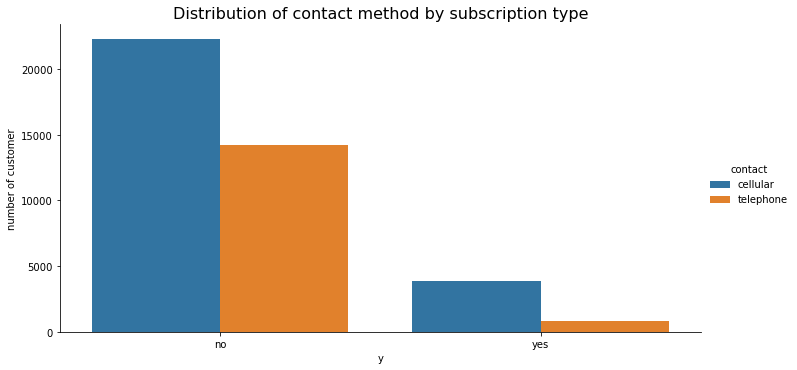

In [16]:
# visualize distribution of subscription by contact
sns.factorplot(x = 'y', y='number of customer', 
               hue = 'contact',data=temp, kind='bar', size=5,  aspect=2)
plt.title("Distribution of contact method by subscription type", fontsize = 16)
plt.show()

In [17]:
# subscription by previous method
temp = pd.DataFrame(df.groupby(["y", "poutcome"])["poutcome"].count()).rename(columns = {"poutcome":"number of customer"}).reset_index().sort_values(by = "number of customer", ascending = False)
temp.head()

,y,poutcome,number of customer
1,no,nonexistent,32422
0,no,failure,3647
4,yes,nonexistent,3141
5,yes,success,894
3,yes,failure,605


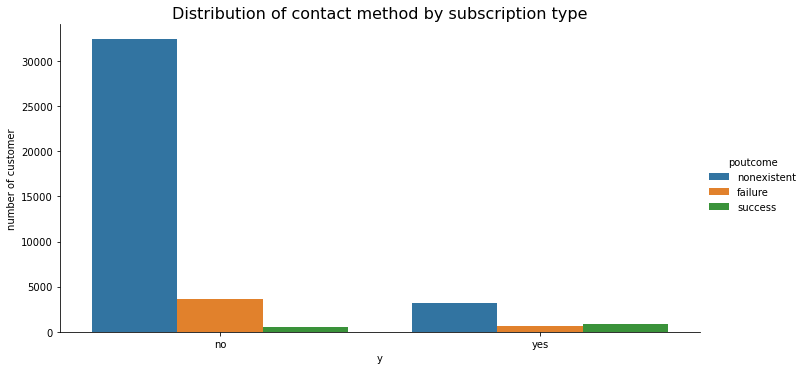

In [18]:
# visualize distribution of subscription by contact
sns.factorplot(x = 'y', y='number of customer', 
               hue = 'poutcome',data=temp, kind='bar', size=5,  aspect=2)
plt.title("Distribution of contact method by subscription type", fontsize = 16)
plt.show()

#### Check collinearity among numeric variables
No variables has correlation greater than 0.6. Thus, there is no multi-collinearity issue

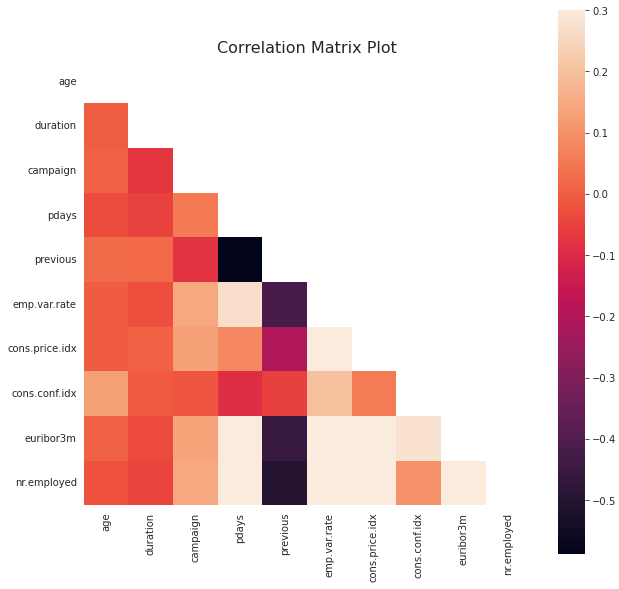

In [19]:
corr_matrix = df.corr()

#plot heat map
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=.3, square=True)
plt.title("Correlation Matrix Plot", fontsize = 16)
plt.show()

In [20]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric = df.select_dtypes(include=numerics)
numeric.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57.0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37.0,226,1,999,0,1.1,NaN,-36.4,4.857,5191.0
3,40.0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56.0,307,1,999,0,1.1,NaN,-36.4,4.857,5191.0


#### Check distribution of numeric variables using boxplot
There are many outliers in variables age, duration, and campaign. So, I decide to use tree-based models for modeling, as tree-based models are robust to outliers. Tree algorithms split the data points based on same value and thus value of outlier won't affect that much to the split. 

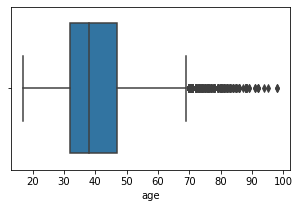

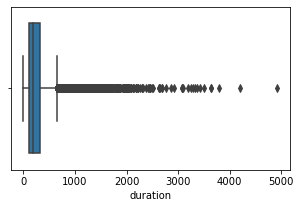

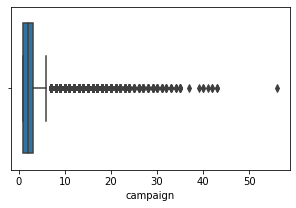

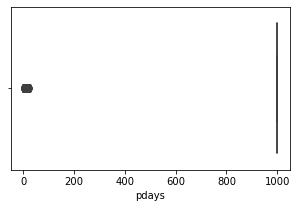

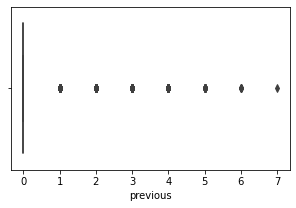

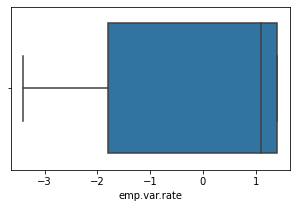

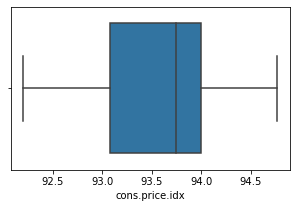

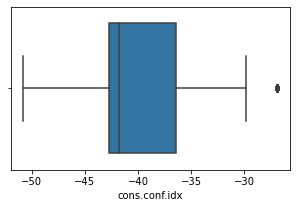

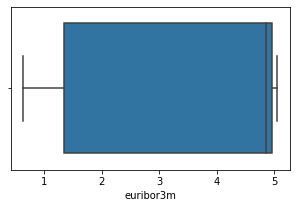

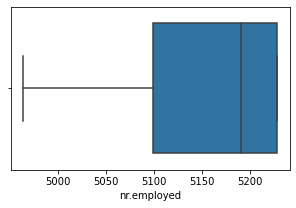

In [21]:
# distribution of numeric variables
for col in numeric:
    plt.subplots(1,1,figsize=(5, 3))
    sns.boxplot(numeric[numeric[col].notnull()][col])

## Part II: Data Preprocessing & Preparation
- Hanlde missing value

In [22]:
# number of missing values
df.isnull().sum().sum()

8892

In [23]:
# count of missing values by column
df.isnull().sum()

age               3744
job                  0
marital              0
education            0
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx    5148
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [24]:
# percentage of missing values
np.round(df.isnull().sum() *100/len(df),2)

age                9.09
job                0.00
marital            0.00
education          0.00
default            0.00
housing            0.00
loan               0.00
contact            0.00
month              0.00
day_of_week        0.00
duration           0.00
campaign           0.00
pdays              0.00
previous           0.00
poutcome           0.00
emp.var.rate       0.00
cons.price.idx    12.50
cons.conf.idx      0.00
euribor3m          0.00
nr.employed        0.00
y                  0.00
dtype: float64

#### There are 3,744 (9.09%) missing values in age column and 5,148 (12.5%) missing values in cons.price.idx columns. 

### Handle missing values

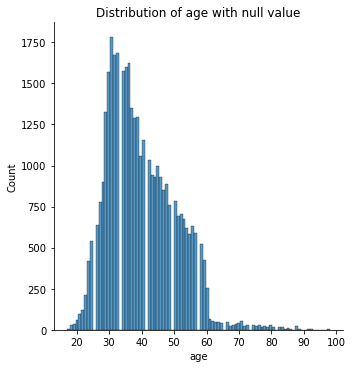

In [25]:
# check distribution of age 
sns.displot(df[df['age'].notnull()]['age'])
plt.title("Distribution of age with null value")
plt.show()

In [26]:
df['age'].mean()

39.99994658690311

In [27]:
df['age'].median()

38.0

#### Use linear interpolation to fill missing values in age column

In [28]:
df["age"] = df["age"].interpolate()

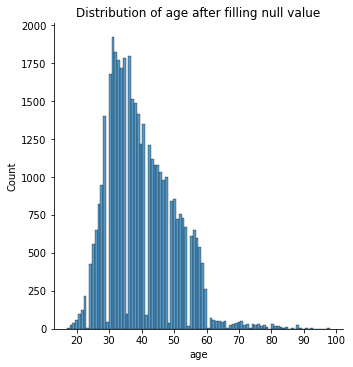

In [29]:
# check distribution of age after filling missing value and the shape of distribution does not change much
sns.displot(df['age'])
plt.title("Distribution of age after filling null value")
plt.show()

#### Use linear interpolation to fill the missing value gaps for con.price.idx column. 
Linear interpolation takes the avergae of previous value and next value.

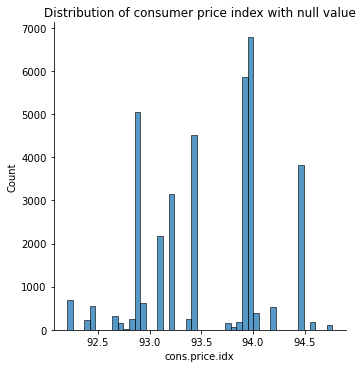

In [30]:
# check distribution of cons.price.idx
sns.displot(df[df['cons.price.idx'].notnull()]['cons.price.idx'])
plt.title("Distribution of consumer price index with null value")
plt.show()

In [31]:
df['cons.price.idx'] = df['cons.price.idx'].interpolate()

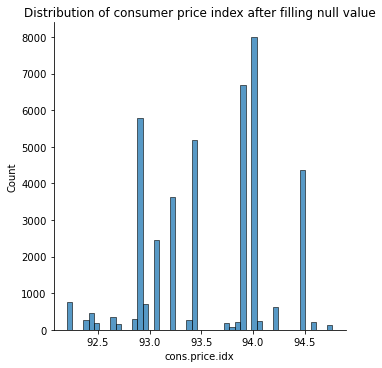

In [32]:
# check distribution of cons.price.idx after filling missing value and the shape of distribution does not change much
sns.displot(df['cons.price.idx'])
plt.title("Distribution of consumer price index after filling null value")
plt.show()

In [33]:
# no missing values exist in data 
df.isnull().sum().sum()

0

## Part III: Feature Engineering
- Encode variables 
- Change pdays variables from numeric to categorical 
- Drop duration column

#### Sperate predictors and response variable 

In [34]:
# X: predictors  y: response variable
X = df.loc[:, df.columns != "y" ]
y = df[["y"]]

#### Encode y variable
- 0: no
- 1: yes

In [35]:
y = pd.DataFrame(y["y"].apply(lambda x: 1 if x == "yes" else 0))
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [36]:
# count by y class
y.value_counts()

y
0    36548
1     4640
dtype: int64

#### "999" in pdays column means client was not previously contacted. I decide to change this numeric column into 4 categorical variables. 
- 'pdays_no_contact': clients are not contacted (1: yes, 0: no)
- 'pdays_0_10': clients were contacted past 0 to 10 days (1: yes, 0: no)
- 'pdays_11_20': clients were contact past 11 to 20 days (1: yes, 0: no)
- 'pdays_21_30': clients were contact past 21 to 30 days (1: yes, 0: no)

In [37]:
# create 4 categorcial variables 
X['pdays_no_contact'] = X['pdays'].apply(lambda x: 1 if x == 999 else 0) 
X['pdays_0_10'] = X['pdays'].apply(lambda x: 1 if (x >= 0 and x <= 10) else 0)
X['pdays_11_20'] = X['pdays'].apply(lambda x: 1 if (x > 10 and x <= 20) else 0)
X['pdays_21_30'] = X['pdays'].apply(lambda x: 1 if (x > 20 and x <= 30) else 0)

In [38]:
# drop column pdays
X = X.drop(["pdays"], axis = 1)

#### Drop duration column
According to prompt, this attribute highly affects the output target. Yet, the duration is not known before a call is performed. Also, after the end of the call, y is obviously known.Thus, this variable should be discarded if the intention is to have a realistic predictive model.

In [39]:
X  = X.drop(["duration"], axis = 1)

#### Encode categorical variables with one hot encoding

In [40]:
X = pd.get_dummies(X)

In [41]:
# data dimension after encoding
X.shape

(41188, 65)

## Part IV: Resolve imbalanced trian data: oversample minority data using SMOTE technique
**Steps of smote:**
- Random sample from the minority class.
- Identify the k nearest neighbors.
- Take one of those neighbors and identify the vector between the current data point and the selected neighbor.
- Multiply the vector by a random number between 0 and 1.
- To obtain the synthetic data point, add this to the current data point

**So I will use balanced train data to train model and predict on imbalanced test data**

In [42]:
# Split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42, stratify=y)

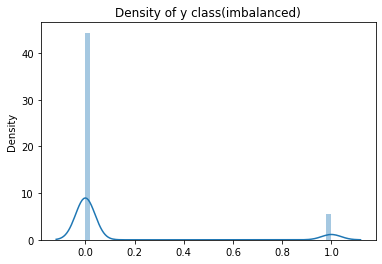

In [43]:
# distribution of train data by class (highly imbalanced)
sns.distplot(y_train)
plt.title("Density of y class(imbalanced)")
plt.show()

In [44]:
# count of values by y class
y_train.value_counts()

y
0    29238
1     3712
dtype: int64

In [45]:
# Apply SMOTE to ensure class balance for train data
sm = SMOTE(random_state=42, sampling_strategy= 1) # oversample
#sm = RandomUnderSampler(random_state=12, sampling_strategy= 1) # undersample
X_train, y_train= sm.fit_resample(X_train, y_train)

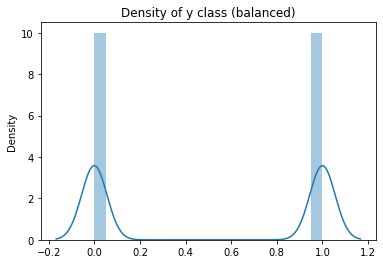

In [46]:
# density plot of y class after balancing 
#sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(y_train)
plt.title("Density of y class (balanced)")
plt.show()

In [47]:
y_train.value_counts()

y
0    29238
1    29238
dtype: int64

## Part V: Model Training & Evaluation
- Ensure balanced class weight
- Use RandomizedSearchCV to tune hyperparameters for each model
- Apply 5-fold cross validation
- Evaluate model using, f1 score, precision,and recall because test data is not balanced.I care more about whether the models can capture 1 instead of 0.
- Plot confusion matrix
- Plot precision & recall curve for all models
- Result summary table

### Logistic Regression

In [48]:
# hyperparametering tuning
C = np.logspace(-4, 4, num=10)
penalty = ['l1', 'l2','elasticnet', 'none']
solver = ['liblinear', 'saga']
max_iter =  [100, 1000,2500]

hyperparameters = dict(C=C, penalty=penalty, solver=solver,max_iter = max_iter)

In [49]:
logit = LogisticRegression(class_weight= "auto")


rnd_logit = RandomizedSearchCV(logit, param_distributions = hyperparameters,
                                cv=2, random_state=42, n_jobs=-1)

rnd_logit.fit(X_train, y_train)

RandomizedSearchCV(cv=2, estimator=LogisticRegression(class_weight='auto'),
                   n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42)

In [50]:
rnd_logit.best_params_

{'solver': 'saga', 'penalty': 'l1', 'max_iter': 2500, 'C': 10000.0}

In [51]:
#prediction
logit_best_model= rnd_logit.best_estimator_
y_pred = logit_best_model.predict(X_test)

In [52]:
## comput train, test accuracy
lr_train_accuracy = rnd_logit.score(X_train,y_train)
lr_test_accuracy = rnd_logit.score(X_test,y_test)
print (f'Train Accuracy - : {rnd_logit.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rnd_logit.score(X_test,y_test):.3f}')

Train Accuracy - : 0.766
Test Accuracy - : 0.815


In [53]:
# f1 score
logit_f1 = f1_score(y_test, y_pred)
logit_f1

0.4480636988780311

In [54]:
#precision and reall
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
 
print('Precision lr: ',precision_lr)
print('Recall lr: ',recall_lr)

Precision lr:  0.33732970027247955
Recall lr:  0.6670258620689655


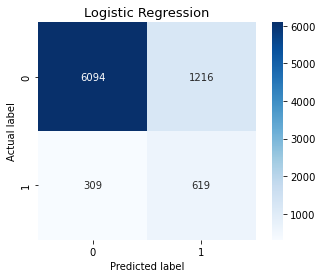

In [55]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
 
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap='Blues')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title("Logistic Regression", fontsize = 13)
plt.show()

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      7310
           1       0.34      0.67      0.45       928

    accuracy                           0.81      8238
   macro avg       0.64      0.75      0.67      8238
weighted avg       0.88      0.81      0.84      8238



### Random Forest

In [57]:
# Number of trees in random forest
n_estimators = stats.randint(150, 600)
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = np.arange(4,10,2)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# gini or entropy
criterion = ['gini', 'entropy']

In [58]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap,
             "criterion":criterion}

In [59]:
rf_Model = RandomForestClassifier(class_weight="balanced")
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 5, n_jobs = -1,verbose=2, random_state = 42)

In [60]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([4, 6, 8]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017ED88B1100>},
                   random_state=42, verbose=2)

In [61]:
# best parameters
rf_RandomGrid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 456}

In [62]:
rf_best_model= rf_RandomGrid.best_estimator_
y_pred = rf_best_model.predict(X_test)

In [63]:
rf_train_accuracy = rf_RandomGrid.score(X_train,y_train)
rf_test_accuracy = rf_RandomGrid.score(X_test,y_test)
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.811
Test Accuracy - : 0.871


In [64]:
rf_f1 = f1_score(y_test, y_pred)
rf_f1

0.5161878704970361

In [65]:
#calculating precision and reall
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
 
print('Precision rf: ',precision_rf)
print('Recall rf: ',recall_rf)

Precision rf:  0.4474308300395257
Recall rf:  0.6099137931034483


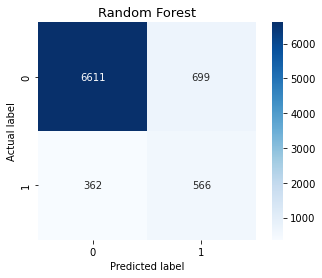

In [66]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
 
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap='Blues')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title("Random Forest", fontsize = 13)
plt.show()

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      7310
           1       0.45      0.61      0.52       928

    accuracy                           0.87      8238
   macro avg       0.70      0.76      0.72      8238
weighted avg       0.89      0.87      0.88      8238



### XGBoost

In [68]:
param_dist = {'n_estimators': stats.randint(150, 600),
              'learning_rate': stats.uniform(0.01, 0.8),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 5, 7,  9, 12],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4],
              'n_iter':[10,200, 500, 1000]
             }

In [69]:
clf_xgb = xgb(objective = 'binary:logistic', class_weight= "balanced")
xgb_rnd_search = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = 5,  
                         verbose = 3, 
                         n_jobs = -1)
xgb_rnd_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[17:14:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "class_weight", "n_iter" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           class_weight='balanced',
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constr...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017ED84C9580>,
                                        'max_depth': [3, 5, 7, 9, 12],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017ED896E0D0>,
                                        'n_iter': [10, 200, 500, 1000],
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017ED88B1880>},
                   verbose=3)

In [70]:
xgb_rnd_search.best_params_

{'colsample_bytree': 0.8739550598548017,
 'learning_rate': 0.06367709694228635,
 'max_depth': 7,
 'min_child_weight': 4,
 'n_estimators': 587,
 'n_iter': 500,
 'subsample': 0.765048704329647}

In [71]:
xgb_best_model= xgb_rnd_search.best_estimator_
y_pred = xgb_best_model.predict(X_test)

In [72]:
xgb_train_accuracy = xgb_rnd_search.score(X_train,y_train)
xgb_test_accuracy = xgb_rnd_search.score(X_test,y_test)
print (f'Train Accuracy - : {xgb_rnd_search.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {xgb_rnd_search.score(X_test,y_test):.3f}')

Train Accuracy - : 0.962
Test Accuracy - : 0.900


In [73]:
# f1 score
xgb_f1 = f1_score(y_test, y_pred, average= "binary")
xgb_f1

0.4329183955739972

In [75]:
#calculating precision and reall
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)
 
print('Precision XGboost: ',precision_xgb)
print('Recall XGboost: ',recall_xgb)

Precision XGboost:  0.6042471042471043
Recall XGboost:  0.33728448275862066


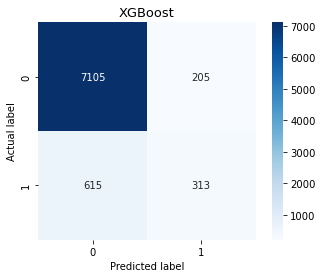

In [76]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
#labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap='Blues')
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title("XGBoost", fontsize = 13)
plt.show()

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7310
           1       0.60      0.34      0.43       928

    accuracy                           0.90      8238
   macro avg       0.76      0.65      0.69      8238
weighted avg       0.88      0.90      0.89      8238



### Precision Recall Curve

Logistic Regression: f1=0.448 auc=0.442


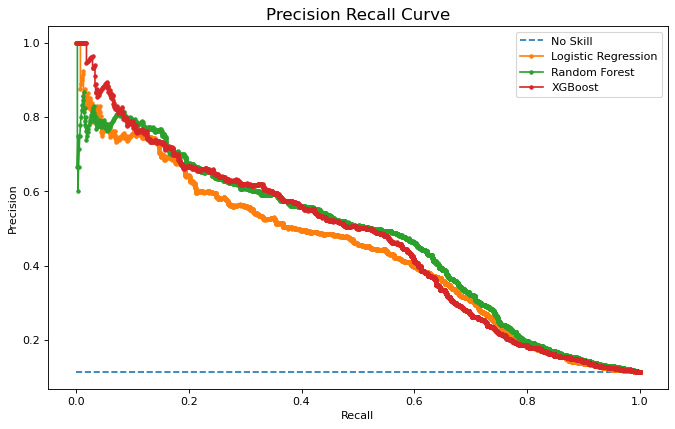

In [78]:
# precision and recall curve 
# predict probabilities
lr_probs = rnd_logit.predict_proba(X_test)
rf_probs = rf_RandomGrid.predict_proba(X_test)
xgb_probs = xgb_rnd_search.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
rf_probs = rf_probs[:, 1]
xgb_probs  = xgb_probs[:, 1]

# predict class values
yhat = rnd_logit.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

yhat =  rf_RandomGrid.predict(X_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test, yhat), auc(rf_recall, rf_precision)

yhat = xgb_rnd_search.predict(X_test)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probs)
xgb_f1, xgb_auc = f1_score(y_test, yhat), auc(xgb_recall, xgb_precision)


# summarize scores
print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
figure(figsize=(10, 6), dpi=80)
no_skill = len(y_test[y_test.values==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
plt.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
plt.plot(xgb_recall, xgb_precision, marker='.', label='XGBoost')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
pyplot.legend()
plt.title("Precision Recall Curve", fontsize = 15)
# show the plot
plt.show()


In [79]:
## Result Summary Table 
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    
    '10-Fold CV Accuracy': [lr_train_accuracy, rf_train_accuracy, xgb_train_accuracy],
    'Test Accuracy': [lr_test_accuracy, rf_test_accuracy, xgb_test_accuracy],
    'F1-Score': [lr_f1, rf_f1,xgb_f1],
    'Precision':[precision_lr, precision_rf, precision_xgb],
    'Recall':[recall_lr, recall_rf, recall_xgb]
    })

# sort value by f1 scores
models.sort_values(by=['F1-Score', 'Recall'], ascending=False)

,Model,10-Fold CV Accuracy,Test Accuracy,F1-Score,Precision,Recall
1,Random Forest,0.810589,0.871207,0.516188,0.447431,0.609914
0,Logistic Regression,0.766263,0.814882,0.448064,0.337330,0.667026
2,XGBoost,0.962412,0.900461,0.432918,0.604247,0.337284
